# Taxonomic and functional analysis

### Objectives:
1- **Taxonomic assignment:**

- Identify which species are actively expressing genes in each sample (heathland and woodland) using [Centrifuge](https://ccb.jhu.edu/software/centrifuge/manual.shtml)

- Visualize the taxonomic classification using [Krona](https://github.com/marbl/Krona/wiki)

- Compare some species between the two environments.

2- **Functional Analysis Using hmmscan + Pfam**

- Determine which biological processes (e.g., GO terms, KEGG pathways) or metabolic pathways are actively expressed.

- Compare the active functions or pathways between heathland and woodland samples.

In [2]:
! seqkit fq2fa ../../data/metatranscriptomics/preprocessing/metaT_heath_porechop_sortmerna.fastq -o ../../data/metatranscriptomics/preprocessing/metaT_heath_porechop_sortmerna.fasta

# **1- Taxonomic assignation: Centrifuge and Krona** 

[Centrifuge](https://ccb.jhu.edu/software/centrifuge/) uses an indexing method based on the Burrows-Wheeler Transform (BWT) and Ferragina-Manzini (FM) index, optimized for metagenomic classification. It assigns an NCBI Taxonomy label to sequences when possible. If the sequence is not similar to any genomic sequence in the database, no label will be assigned.

Another tool that can be used for taxonomic classification is [Kraken2](https://www.ccb.jhu.edu/software/kraken2/).

Outputs:
- **Classification file (.class):** taxonomic assignments for each read.
- **Report file (.out):** summary of taxa detected with counts and relative abundances.

### **1.1 Download and extract the pre-build database**

The Centrifuge database (nt) must be downloaded and indexed beforehand. Read [manual](https://ccb.jhu.edu/software/centrifuge/manual.shtml)

### **1.2- Classify metaT_heath and metaT_wood datasets**

This command runs Centrifuge to perform taxonomic classification on cleaned metaT reads (non-rRNA). 

``` -q ``` Input file is in FASTQ format

``` -x PATH ``` Path to Centrifuge index 

```--threads INT ```  Number of CPU threads to use

``` -U FILE ``` Input file

```-k INT``` Report up to INT classification of reads 

```-S FILE ``` Output file for classification results  

```
centrifuge -q \
-x /db/centrifuge/nr/nr_latest/nt \
--threads 12 \
-U ../../data/metatranscriptomics/preprocessing/metaT_heath_porechop_sortmerna.fastq \
-k 15 \
-S ../../data/metatranscriptomics/taxfun/metaT_heath_porechop_sortmerna_all_centrifuge.class

```
centrifuge -q \
-x /db/centrifuge/nr/nr_latest/nt \
--threads 12 \
-U ../../data/metatranscriptomics/preprocessing/metaT_wood_porechop_sortmerna.fastq \
-k 15 \
-S ../../data/metatranscriptomics/taxfun/metaT_wood_porechop_sortmerna_all_centrifuge.class 

In [3]:
!head ../../data/metatranscriptomics/taxfun/metaT_heath_porechop_sortmerna_all_centrifuge.class | column -t

readID          seqID         taxID    score  2ndBestScore  hitLength  queryLength  numMatches
SRR28223365.1   unclassified  0        0      0             0          94           1
SRR28223365.13  unclassified  0        0      0             0          32           1
SRR28223365.2   unclassified  0        0      0             0          131          1
SRR28223365.9   OX352306.1    1870148  2025   0             60         90           1
SRR28223365.7   unclassified  0        0      0             0          130          1
SRR28223365.20  unclassified  0        0      0             0          15           1
SRR28223365.19  unclassified  0        0      0             0          122          1
SRR28223365.10  CP099840.1    41070    81     0             24         141          1
SRR28223365.28  unclassified  0        0      0             0          14           1


This table shows results from Centrifuge assigning sequencing reads to taxa.

| Column         | Description                                                                                  |
|----------------|----------------------------------------------------------------------------------------------|
| **readID**     | Identifier of the sequencing read .                                 |
| **seqID**      | Reference sequence ID assigned or `unclassified` if no assignment.                         |
| **taxID**      | NCBI taxonomy ID of the assigned reference (0 if unclassified).                           |
| **score**      | Score of the best hit (indicates match quality).                                          |
| **2ndBestScore**| Score of the second-best hit (useful to evaluate assignment confidence).                  |
| **hitLength**  | Length of the matching region to the reference sequence.                                  |
| **queryLength**| Length of the query read.                                                                  |
| **numMatches** | Number of hits found.

### **1.3- Generate a kreport to visualize the results with Krona**

Krona is an interactive visualization tool designed to explore complex hierarchical data, especially biological taxonomies. It creates zoomable, multi-layered pie charts that allow users to intuitively browse through taxonomic classifications and abundances.  

```
centrifuge-kreport -x /db/centrifuge/nr/nr_latest/nt  ../../data/metatranscriptomics/taxfun/metaT_heath_porechop_sortmerna_all_centrifuge.class  > ../../data/metatranscriptomics/taxfun/metaT_heath_porechop_sortmerna.kreport

centrifuge-kreport -x /db/centrifuge/nr/nr_latest/nt ../../data/metatranscriptomics/taxfun/metaT_wood_porechop_sortmerna_all_centrifuge.class  > ../../data/metatranscriptomics/taxfun/metaT_wood_porechop_sortmerna.kreport

In [5]:
!head ../../data/metatranscriptomics/taxfun/metaT_wood_porechop_sortmerna.kreport

 19.18	24451	24451	U	0	unclassified
 80.82	103003	2181	-	1	root
 78.77	100397	4699	-	131567	  cellular organisms
 72.45	92335	20924	D	2759	    Eukaryota
 51.24	65303	2847	-	33154	      Opisthokonta
 47.92	61081	63	K	33208	        Metazoa
 47.86	61004	114	-	6072	          Eumetazoa
 47.73	60830	11895	-	33213	            Bilateria
 27.45	34986	1408	-	33317	              Protostomia
 25.09	31975	71	-	1206794	                Ecdysozoa


### **1.4- Visualize Hierarchically with Krona**

Krona generates a hierarchical multi-layered pie chart that allow us to interactively explore all taxonomic classifications inthe a web browser.

```
ktImportTaxonomy -n Heath ../../data/metatranscriptomics/taxfun/metaT_heath_porechop_sortmerna.kreport -o ../../data/metatranscriptomics/taxfun/metaT_heath_bacteria_krona.html
ktImportTaxonomy -n Wood ../../data/metatranscriptomics/taxfun/metaT_wood_porechop_sortmerna.kreport -o ../../data/metatranscriptomics/taxfun/metaT_wood_bacteria_krona.html

In [6]:
from IPython.display import HTML

In [2]:
file_path_wood = '../../data/metatranscriptomics/analysis_tax_fun/metaT_wood_krona.html'
file_path_heath = '../../data/metatranscriptomics/analysis_tax_fun/metaT_heath_krona.html'

When analyzing metagenomics or metatranscriptomics data, you often get taxonomic classifications spanning multiple levels. Krona helps visualize these complex relationships clearly and interactively, making it easier to identify dominant taxa or interesting patterns in your data.

| Feature                  | Wood Soil (Forest)                                    | Heath Soil (Shrubland)                              |
|--------------------------|------------------------------------------------------|----------------------------------------------------|
| **Soil pH**              | Neutral to slightly acidic (5.5–7)                    | Acidic (3.5–5.5)                                   |
| **Organic Matter**       | High, rich in lignin and cellulose                    | Moderate to low, more recalcitrant organic matter  |
| **Vegetation**           | Trees, leaf litter                                    | Shrubs, mosses, lichens                            |

### **Bacteria**:
##### Acidobacteria (Soil-associated bacteria) :

[*"The phylum of the Acidobacteria is one of the bacterial lineages that has profited most from the cultivation-independent interrogation of environmental samples. Indeed, in the past two decades, this phylum has grown from being virtually unknown to being recognized as one of the most abundant and diverse on Earth."*](https://www.frontiersin.org/journals/microbiology/articles/10.3389/fmicb.2016.00744/full)
They are often abundant in acidic, nutrient-poor soils. Likely more dominant in heathland environments.

In [15]:
! grep Acidobacteria ../../data/metatranscriptomics/taxfun/metaT_wood_porechop_sortmerna.kreport

  0.19	248	35	F	204434	            Acidobacteriaceae
  0.00	1	0	-	112074	              unclassified Acidobacteriaceae
  0.00	1	1	S	2883246	                Acidobacteriaceae bacterium ZG23-2
  0.00	1	1	S	194844	                uncultured Acidobacteriaceae bacterium


In [16]:
! grep Acidobacteria ../../data/metatranscriptomics/taxfun/metaT_heath_porechop_sortmerna.kreport

  0.28	1348	309	F	204434	            Acidobacteriaceae
  0.00	21	0	-	112074	              unclassified Acidobacteriaceae
  0.00	21	21	S	2883246	                Acidobacteriaceae bacterium ZG23-2
  0.00	16	16	S	194844	                uncultured Acidobacteriaceae bacterium
  0.00	7	7	S	710731	          uncultured Acidobacteria bacterium HF4000_26D02
  0.00	1	1	S	1665086	          uncultured Acidobacteria bacterium Rifle_16ft_4_minimus_33681
  0.00	2	2	S	1660251	            Acidobacteria bacterium Mor1


The relative abundance of Acidobacteria is higher in heathland with respect to woodland (0.28% vs 0.19%, 1348 reads assigned vs 248). The subgroups detected are also higher.

In [16]:
! grep Bradyrhizobium   Summer_School/analysis_tax_fun/metaT_wood_porechop_sortmerna.kreport

  0.03	44	13	G	374	              Bradyrhizobium
  0.01	17	3	-	2631580	                unclassified Bradyrhizobium
  0.00	3	3	S	1404888	                  Bradyrhizobium sp. 1(2017)
  0.00	2	2	S	288000	                  Bradyrhizobium sp. BTAi1
  0.00	1	1	S	83637	                  Bradyrhizobium genosp. L
  0.00	1	1	S	574727	                  Bradyrhizobium sp. C-145
  0.00	1	1	S	1325111	                  Bradyrhizobium sp. CCBAU 53338
  0.00	1	1	S	1325120	                  Bradyrhizobium sp. CCBAU 53421
  0.00	1	1	S	2782643	                  Bradyrhizobium sp. 172
  0.00	1	1	S	2782662	                  Bradyrhizobium sp. 195
  0.00	1	1	S	2782665	                  Bradyrhizobium sp. 200
  0.00	1	1	S	3039154	                  Bradyrhizobium sp. CB1717
  0.00	1	1	S	3039159	                  Bradyrhizobium sp. CB82
  0.00	4	4	S	2840469	                Bradyrhizobium sediminis
  0.00	3	3	S	255045	                Bradyrhizobium canariense
  0.00	2	2	S	1355477	                Bradyrhizobium di

Bradyrhizobium is more abundant in heathland (319 reads vs. 44 reads) and taxonomic diversity is also higher in heathland (64 vs. 18 variants). 


# **2- Functional Annotation with HMMER and Pfam** 

To functionally annotate the metatranscriptomic reads from the wood and heath environments, we can use HMMER’s ```hmmscan``` tool to search against the Pfam-A databasem which contains manually curated protein domain models.

## 2.1. **Pfam-A database Setup**

First, we need to download the latest version of the **Pfam-A HMM database** from Pfam, which contains manually curated Hidden Markov Models (HMMs) representing conserved protein domains

```
wget https://ftp.ebi.ac.uk/pub/databases/Pfam/current_release/Pfam-A.hmm.gz
gunzip Pfam-A.hmm.gz
```

HMM database is now compressed and indexed for fast scanning with hmmscan.

## **2.2. Run hmmscan** 

``` -cpu INT ``` Number of CPU threads to use 

``` -domblout FILE ``` Output file for domain table results (tabular format)

```-Pfam-A.hmm ```  HMM profile database (Pfam-A) used for protein domain search

``` INPUT_FILE ``` Query sequences in FASTA or FASTQ format


```
hmmscan --cpu 12 \
    --domtblout ../../data/metatranscriptomics/taxfun/pfam_wood.domtblout \
    Pfam-A.hmm \
    ../../data/metatranscriptomics/preprocessing/metaT_wood_porechop_sortmerna.fastq

hmmscan --cpu 12 \
    --domtblout ../../data/metatranscriptomics/taxfun/pfam_heath.domtblout \
    Pfam-A.hmm \
    ../../data/metatranscriptomics/preprocessing/metaT_heath_porechop_sortmerna.fastq

In [18]:
! head ../../data/metatranscriptomics/taxfun/pfam_wood.domtblout 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
#                                                                            --- full sequence --- -------------- this domain -------------   hmm coord   ali coord   env coord
# target name        accession   tlen query name           accession   qlen   E-value  score  bias   #  of  c-Evalue  i-Evalue  score  bias  from    to  from    to  from    to  acc description of target
#------------------- ---------- ----- -------------------- ---------- ----- --------- ------ ----- --- --- --------- --------- ------ ----- ----- ----- ----- ----- ----- ----- ---- ---------------------
DUF6465              PF20069.4    130 SRR28223359.15       -             89       2.4    8.6  17.3   1   1   0.00012       2.9    8.4  17.3    11    55     6    50     1    65 0.26 Family of unknown function (DUF6465)
Ribosomal_60s        PF00428.24    88 SRR28223

In [20]:
import pandas as pd

columns = [
    "target_name", "target_accession", "tlen",
    "query_name", "query_accession", "qlen",
    "E_value_full_sequence", "score_full_sequence", "bias_full_sequence",
    "domain_num", "domain_total",
    "c_Evalue_domain", "i_Evalue_domain", "score_domain", "bias_domain",
    "hmm_from", "hmm_to",
    "ali_from", "ali_to",
    "env_from", "env_to",
    "acc",
    "description_of_target"
]

rows = []
with open('../../data/metatranscriptomics/taxfun/pfam_wood.domtblout') as file:
    for line in file:
        if line.startswith("#"):
            continue
        parts = line.strip().split()
        description = " ".join(parts[22:])
        fixed_cols = parts[:22]
        rows.append(fixed_cols + [description])


df_wood = pd.DataFrame(rows, columns=columns)

num_cols = ["tlen", "qlen", "E_value_full_sequence", "score_full_sequence", "bias_full_sequence",
            "domain_num", "domain_total", "c_Evalue_domain", "i_Evalue_domain",
            "score_domain", "bias_domain", "hmm_from", "hmm_to", "ali_from", "ali_to",
            "env_from", "env_to", "acc"]
for col in num_cols:
    df_wood[col] = pd.to_numeric(df_wood[col], errors='coerce')


In [21]:
df_wood

,target_name,target_accession,tlen,query_name,query_accession,qlen,E_value_full_sequence,score_full_sequence,bias_full_sequence,domain_num,...,score_domain,bias_domain,hmm_from,hmm_to,ali_from,ali_to,env_from,env_to,acc,description_of_target
0,DUF6465,PF20069.4,130,SRR28223359.15,-,89,2.400,8.6,17.3,1,...,8.4,17.3,11,55,6,50,1,65,0.26,Family of unknown function (DUF6465)
1,Ribosomal_60s,PF00428.24,88,SRR28223359.21,-,72,1.700,9.7,17.3,1,...,9.1,17.3,47,68,41,64,26,68,0.47,60s Acidic ribosomal protein
2,CFAP143,PF22584.1,437,SRR28223359.32,-,225,1.500,8.9,30.9,1,...,8.5,30.9,17,168,50,199,36,211,0.28,Cilia- and flagella-associated protein 143
3,DDHD,PF02862.22,258,SRR28223359.32,-,225,8.900,6.8,7.9,1,...,6.6,7.9,119,165,79,136,53,202,0.40,DDHD domain
4,Ribosomal_60s,PF00428.24,88,SRR28223359.37,-,42,1.500,9.8,18.9,1,...,9.8,18.9,44,67,20,40,5,42,0.39,60s Acidic ribosomal protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,Plasmodium_Vir,PF05795.16,377,SRR28223359.14762,-,160,9.800,6.0,6.8,1,...,5.8,6.8,231,300,76,133,34,148,0.34,Plasmodium vivax Vir protein
1573,PRCC,PF10253.14,189,SRR28223359.14768,-,182,1.900,9.7,4.6,1,...,9.5,4.6,21,62,16,57,1,105,0.42,"Mitotic checkpoint regulator, MAD2B-interacting"
1574,GP38,PF05268.17,218,SRR28223359.14785,-,59,2.600,8.2,15.5,1,...,8.2,15.5,106,153,9,54,3,59,0.68,Phage tail fibre adhesin Gp38
1575,TrAA12,PF22807.2,463,SRR28223359.14803,-,118,0.072,11.8,28.8,1,...,11.6,28.8,387,446,23,82,14,112,0.57,TrAA12-like


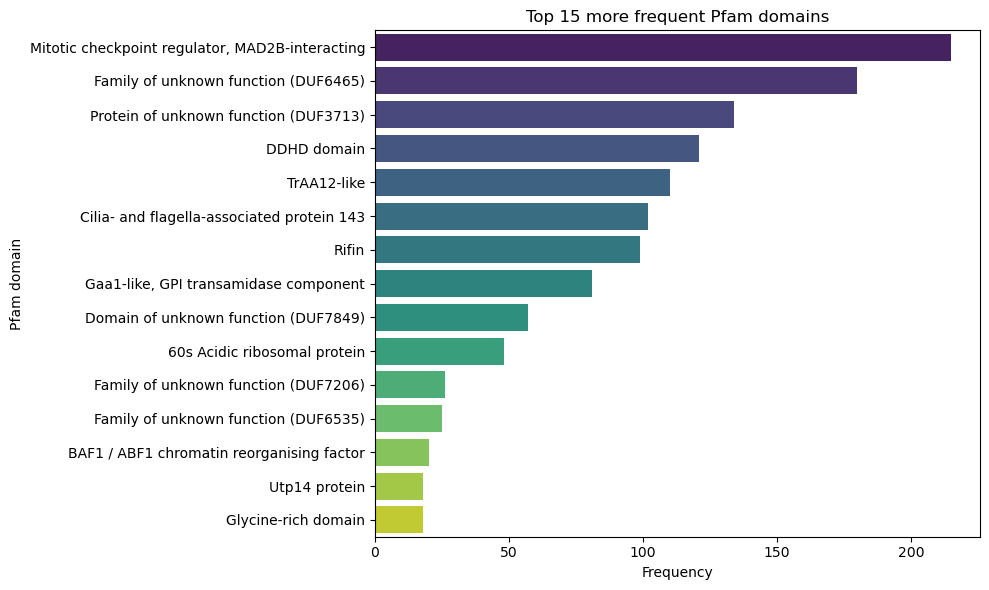

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
top_domains = df_wood['description_of_target'].value_counts().nlargest(15)
sns.barplot(x=top_domains.values, y=top_domains.index, hue= top_domains.index, palette='viridis')
plt.xlabel("Frequency")
plt.ylabel("Pfam domain")
plt.title("Top 15 more frequent Pfam domains")
plt.tight_layout()
plt.show()

We can identify the most represented functional domains in our sample. The most frequent domains might be linked to key biological functions or ecological processes active in the sampled environment.